# I4C Team 25049 Mindpetal Metro Ridershop Data Analysis

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Document outline:
- download the data
- convert to data frame
- checking shape, features, outliers, missing data, etc (initial thought: might have to change 0.1K to 1000 etc)
- graphs
- beautiful graphs
- next: look at additional datasets & see what connections we can find
- end results: we have found out x about the trends and y about why it happens


we'll have to look at the map & see what the metro stops are like

additional datasets for later:

There are many open datasets you can access at places such as:
• https://opendata.maryland.gov/ (each state will have similar open data)
• https://www.data.gov/
• https://datascience.nih.gov/covid-19-open-access-resources
• https://www.transportation.gov/data

In [6]:
d4= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/December_04_2024-Table 1.csv')
d21= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/December_21_2024-Table 1.csv')
j5= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/June_15_2024-Table 1.csv')
j15= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/June_05_2024-Table 1.csv')
m23= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/March_23_2024-Table 1.csv')
m6= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/March_6_2024-Table 1.csv')
s21= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/September_21_2024-Table 1.csv')
s4= pd.read_csv('/content/drive/MyDrive/WMATA_Ridership_Summary/September_4_2024-Table 1.csv')


In [7]:
d21.head()

,Station Name,Time Period,Avg Daily Entries
0,Woodley Park,Late Night (12am-Close),0.0K
1,Wiehle-Reston East,Late Night (12am-Close),0.0K
2,Wheaton,Late Night (12am-Close),0.0K
3,West Hyattsville,Late Night (12am-Close),0.0K
4,West Falls Church,Late Night (12am-Close),0.0K


In [8]:
d4.head()

,Station Name,Time Period,Avg Daily Entries
0,Woodley Park,Late Night (12am-Close),0.0K
1,Wiehle-Reston East,Late Night (12am-Close),0.0K
2,Wheaton,Late Night (12am-Close),0.0K
3,West Hyattsville,Late Night (12am-Close),0.0K
4,West Falls Church,Late Night (12am-Close),0.0K


In [9]:
d4['Date']='D04'
d21['Date']='D21'
j5['Date']='J05'
j15['Date']='J15'
m23['Date']='M23'
m6['Date']='M06'
s21['Date']='S21'
s4['Date']='S04'


In [10]:
print(d4['Station Name'].value_counts())
print(d21['Station Name'].value_counts())
print(j5['Station Name'].value_counts())
print(j15['Station Name'].value_counts())
print(m23['Station Name'].value_counts())
print(m6['Station Name'].value_counts())
print(s21['Station Name'].value_counts())
print(s4['Station Name'].value_counts())


Station Name
Woodley Park          5
Dunn Loring           5
East Falls Church     5
Eastern Market        5
Eisenhower Ave        5
                     ..
Potomac Ave           5
Potomac Yard          5
Reston Town Center    5
Rhode Island Ave      5
Addison Road          5
Name: count, Length: 98, dtype: int64
Station Name
Woodley Park          5
Dunn Loring           5
East Falls Church     5
Eastern Market        5
Eisenhower Ave        5
                     ..
Potomac Ave           5
Potomac Yard          5
Reston Town Center    5
Rhode Island Ave      5
Arlington Cemetery    4
Name: count, Length: 98, dtype: int64
Station Name
Woodley Park         5
Foggy Bottom-GWU     5
Dunn Loring          5
Dupont Circle        5
East Falls Church    5
                    ..
Pentagon City        5
Potomac Ave          5
Potomac Yard         5
Takoma               4
Glenmont             3
Name: count, Length: 96, dtype: int64
Station Name
Woodley Park          5
Wiehle-Reston East    5
Dupon

In [11]:
j15 #note: discovered that some stations are not represented the same amount of times across each table

,Station Name,Time Period,Avg Daily Entries,Date
0,Woodley Park,Late Night (12am-Close),0.0K,J15
1,Wiehle-Reston East,Late Night (12am-Close),0.0K,J15
2,West Hyattsville,Late Night (12am-Close),0.0K,J15
3,West Falls Church,Late Night (12am-Close),0.0K,J15
4,Waterfront,Late Night (12am-Close),0.0K,J15
...,...,...,...,...
475,Ashburn,AM Peak (Open-9:30am),1.2K,J15
476,Arlington Cemetery,AM Peak (Open-9:30am),0.1K,J15
477,Archives,AM Peak (Open-9:30am),0.2K,J15
478,Anacostia,AM Peak (Open-9:30am),1.6K,J15


In [12]:
df= pd.read_csv('/content/drive/MyDrive/IC25 Mindpetal Challenge/data.csv')

In [13]:
df.head()

,Unnamed: 0,Station Name,Time Period,Avg Daily Entries,Date
0,0,Woodley Park,Late Night (12am-Close),0.0K,D04
1,1,Wiehle-Reston East,Late Night (12am-Close),0.0K,D04
2,2,Wheaton,Late Night (12am-Close),0.0K,D04
3,3,West Hyattsville,Late Night (12am-Close),0.0K,D04
4,4,West Falls Church,Late Night (12am-Close),0.0K,D04


In [14]:
df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)
df

,Station Name,Time Period,Avg Daily Entries,Date
0,Woodley Park,Late Night (12am-Close),0.0K,D04
1,Wiehle-Reston East,Late Night (12am-Close),0.0K,D04
2,Wheaton,Late Night (12am-Close),0.0K,D04
3,West Hyattsville,Late Night (12am-Close),0.0K,D04
4,West Falls Church,Late Night (12am-Close),0.0K,D04
...,...,...,...,...
3889,Ashburn,AM Peak (Open-9:30am),1.2K,S04
3890,Arlington Cemetery,AM Peak (Open-9:30am),0.0K,S04
3891,Archives,AM Peak (Open-9:30am),0.3K,S04
3892,Anacostia,AM Peak (Open-9:30am),1.8K,S04


In [15]:
print(df.shape)
print(df['Station Name'].value_counts())
print(df['Time Period'].value_counts())
print(df['Avg Daily Entries'].value_counts())

(3894, 4)
Station Name
Woodley Park             40
Franconia-Springfield    40
Eastern Market           40
Eisenhower Ave           40
Farragut North           40
                         ..
Capitol Heights          39
Glenmont                 38
Arlington Cemetery       38
Silver Spring            30
Wheaton                  30
Name: count, Length: 98, dtype: int64
Time Period
Evening (7pm-12am)         780
AM Peak (Open-9:30am)      780
PM Peak (3pm-7pm)          779
Midday (9:30am-3pm)        779
Late Night (12am-Close)    776
Name: count, dtype: int64
Avg Daily Entries
0.0K     843
0.1K     441
0.2K     412
0.3K     272
0.4K     237
        ... 
6.4K       1
7.0K       1
6.8K       1
10.1K      1
4.3K       1
Name: count, Length: 80, dtype: int64


In [16]:
def remove_k(x):
  end = len(x) - 1
  x = x[0:end]
  return x


df['Avg Daily Entries'] = df['Avg Daily Entries'].apply(remove_k)
df['Avg Daily Entries'] = df['Avg Daily Entries'].astype(float)
df['Avg Daily Entries']

,Avg Daily Entries
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3889,1.2
3890,0.0
3891,0.3
3892,1.8


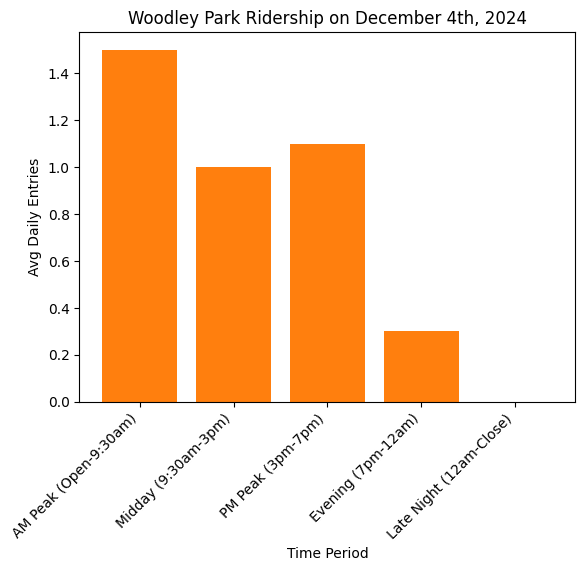

,Station Name,Time Period,Avg Daily Entries,Date
0,Woodley Park,Late Night (12am-Close),0.0,D04
98,Woodley Park,Evening (7pm-12am),0.3,D04
196,Woodley Park,PM Peak (3pm-7pm),1.1,D04
294,Woodley Park,Midday (9:30am-3pm),1.0,D04
392,Woodley Park,AM Peak (Open-9:30am),1.5,D04


In [17]:
woodley_park = df[df['Station Name'] == "Woodley Park"]
woodley_park_d4 = woodley_park[woodley_park['Date'] == 'D04']


new_order = ['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)', 'Late Night (12am-Close)']
plt.bar(new_order, woodley_park_d4.set_index('Time Period').loc[new_order, 'Avg Daily Entries'])




plt.bar(woodley_park_d4['Time Period'], woodley_park_d4['Avg Daily Entries'])



plt.xticks(rotation=45, ha='right')
plt.xlabel('Time Period')
plt.ylabel('Avg Daily Entries')
plt.title('Woodley Park Ridership on December 4th, 2024')
plt.show()
woodley_park_d4

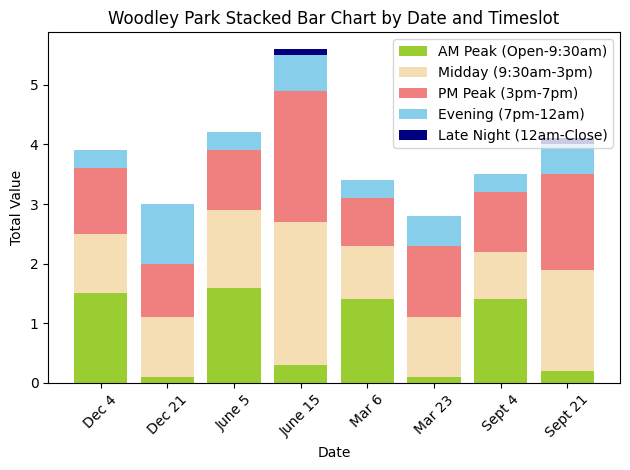

In [55]:
woodley_park_aggregate_dates = woodley_park.groupby(['Date', 'Time Period'])['Avg Daily Entries'].sum().unstack()
woodley_park_aggregate_dates = woodley_park_aggregate_dates[['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)',
       'Late Night (12am-Close)']]
colors = {'Late Night (12am-Close)': 'navy', 'Evening (7pm-12am)': 'skyblue', 'PM Peak (3pm-7pm)': 'lightcoral', 'Midday (9:30am-3pm)': 'wheat', 'AM Peak (Open-9:30am)': 'yellowgreen'}
fig, ax = plt.subplots()

bottom = 0
for timeslot in woodley_park_aggregate_dates.columns:
    ax.bar(woodley_park_aggregate_dates.index, woodley_park_aggregate_dates[timeslot], bottom=bottom, label=timeslot, color=colors[timeslot])
    bottom += woodley_park_aggregate_dates[timeslot]


new_labels = ['Dec 4', 'Dec 21', 'June 5', 'June 15', 'Mar 6', 'Mar 23', 'Sept 4', 'Sept 21']
ax.set_xlabel('Date')
ax.set_ylabel('Total Value')
ax.set_title('Woodley Park Stacked Bar Chart by Date and Timeslot')
ax.legend()
plt.xticks(ticks = x_positions, rotation=45, labels=new_labels)
plt.tight_layout()
plt.show()




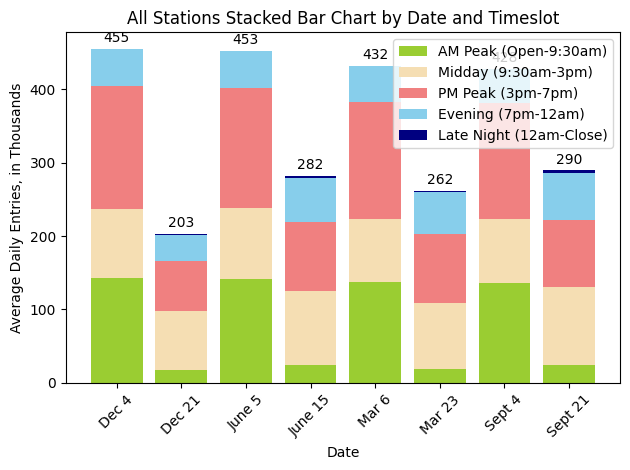

In [54]:
#next: all the stations aggregated
all_stations_aggregate_dates = df.groupby(['Date', 'Time Period'])['Avg Daily Entries'].sum().unstack()
all_stations_aggregate_dates = all_stations_aggregate_dates[['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)','Late Night (12am-Close)']]

colors = {'Late Night (12am-Close)': 'navy', 'Evening (7pm-12am)': 'skyblue', 'PM Peak (3pm-7pm)': 'lightcoral', 'Midday (9:30am-3pm)': 'wheat', 'AM Peak (Open-9:30am)': 'yellowgreen'}
fig, ax = plt.subplots()

bottom = 0
for timeslot in all_stations_aggregate_dates.columns:
    bars = ax.bar(all_stations_aggregate_dates.index, all_stations_aggregate_dates[timeslot], bottom=bottom, label=timeslot, color=colors[timeslot])
    bottom += all_stations_aggregate_dates[timeslot]


for i, total in enumerate(bottom):
    ax.text(i, total + 5, f'{total:.0f}', ha='center', va='bottom')


new_labels = ['Dec 4', 'Dec 21', 'June 5', 'June 15', 'Mar 6', 'Mar 23', 'Sept 4', 'Sept 21']


ax.set_xlabel('Date')
ax.set_ylabel('Average Daily Entries, in Thousands')
ax.set_title('All Stations Stacked Bar Chart by Date and Timeslot')
ax.legend()
plt.xticks(ticks = x_positions, rotation=45, labels = new_labels)
plt.tight_layout()
plt.show()


In [20]:
df_late_night = df[df['Time Period'] == 'Late Night (12am-Close)']
df_late_night['Avg Daily Entries'].value_counts()

,count
Avg Daily Entries,
0.0,701
0.1,57
0.2,9
0.3,7
0.4,1
0.8,1


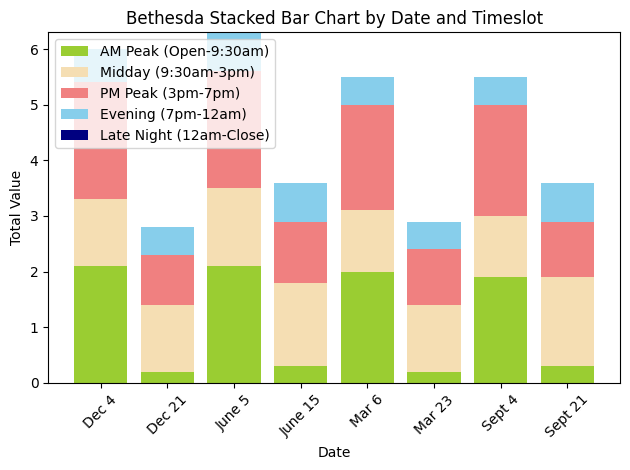

In [61]:
#bethesda
bethesda = df[df['Station Name'] == "Bethesda"]


bethesda_aggregate_dates = bethesda.groupby(['Date', 'Time Period'])['Avg Daily Entries'].sum().unstack()
bethesda_aggregate_dates = bethesda_aggregate_dates[['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)','Late Night (12am-Close)']]

colors = {'Late Night (12am-Close)': 'navy', 'Evening (7pm-12am)': 'skyblue', 'PM Peak (3pm-7pm)': 'lightcoral', 'Midday (9:30am-3pm)': 'wheat', 'AM Peak (Open-9:30am)': 'yellowgreen'}
fig, ax = plt.subplots()

bottom = 0
for timeslot in bethesda_aggregate_dates.columns:
    ax.bar(bethesda_aggregate_dates.index, bethesda_aggregate_dates[timeslot], bottom=bottom, label=timeslot, color=colors[timeslot])
    bottom += bethesda_aggregate_dates[timeslot]


new_labels = ['Dec 4', 'Dec 21', 'June 5', 'June 15', 'Mar 6', 'Mar 23', 'Sept 4', 'Sept 21']
ax.set_xlabel('Date')
ax.set_ylabel('Total Value')
ax.set_title('Bethesda Stacked Bar Chart by Date and Timeslot')
ax.legend()
plt.xticks(ticks = x_positions, rotation=45, labels=new_labels)
plt.tight_layout()
plt.show()

In [23]:
#seasons
df_seasons = df.copy()
#if j, summer, if m, spring, if s, fall, if d, winter
def find_season(x):
    if "J" in x:
      return "Summer"
    elif "M" in x:
      return "Spring"
    elif "S" in x:
      return "Fall"
    else:
      return "Winter"

df_seasons['Season'] = df_seasons['Date'].apply(find_season)
df_seasons

,Station Name,Time Period,Avg Daily Entries,Date,Season
0,Woodley Park,Late Night (12am-Close),0.0,D04,Winter
1,Wiehle-Reston East,Late Night (12am-Close),0.0,D04,Winter
2,Wheaton,Late Night (12am-Close),0.0,D04,Winter
3,West Hyattsville,Late Night (12am-Close),0.0,D04,Winter
4,West Falls Church,Late Night (12am-Close),0.0,D04,Winter
...,...,...,...,...,...
3889,Ashburn,AM Peak (Open-9:30am),1.2,S04,Fall
3890,Arlington Cemetery,AM Peak (Open-9:30am),0.0,S04,Fall
3891,Archives,AM Peak (Open-9:30am),0.3,S04,Fall
3892,Anacostia,AM Peak (Open-9:30am),1.8,S04,Fall


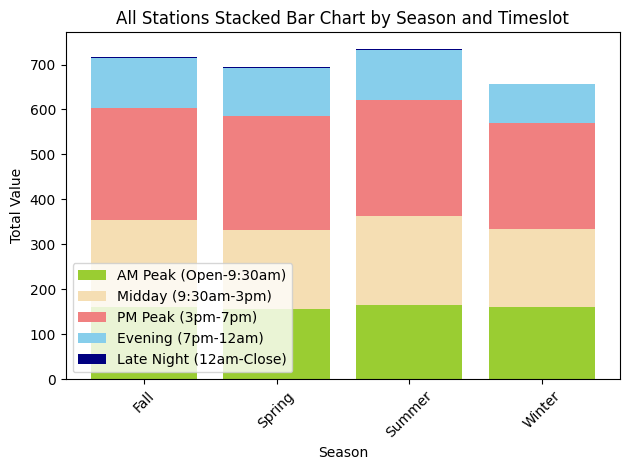

In [24]:
all_stations_aggregate_seasons = df_seasons.groupby(['Season', 'Time Period'])['Avg Daily Entries'].sum().unstack()

all_stations_aggregate_seasons = all_stations_aggregate_seasons[['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)','Late Night (12am-Close)']]


colors = {'Late Night (12am-Close)': 'navy', 'Evening (7pm-12am)': 'skyblue', 'PM Peak (3pm-7pm)': 'lightcoral', 'Midday (9:30am-3pm)': 'wheat', 'AM Peak (Open-9:30am)': 'yellowgreen'}
fig, ax = plt.subplots()

bottom = 0
for timeslot in all_stations_aggregate_seasons.columns:
    ax.bar(all_stations_aggregate_seasons.index, all_stations_aggregate_seasons[timeslot], bottom=bottom, label=timeslot, color=colors[timeslot])
    bottom += all_stations_aggregate_seasons[timeslot]

ax.set_xlabel('Season')
ax.set_ylabel('Total Value')
ax.set_title('All Stations Stacked Bar Chart by Season and Timeslot')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




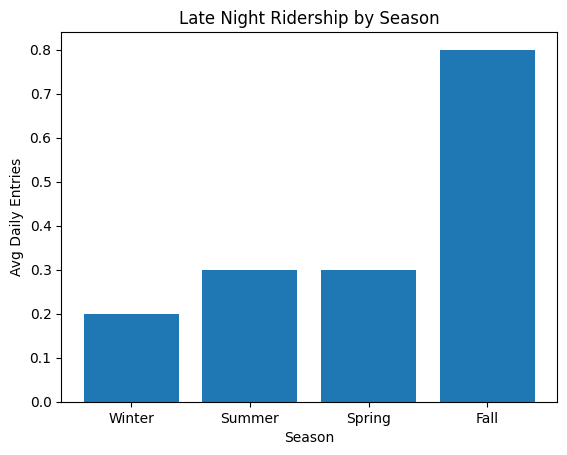

In [25]:
seasons_late_night = df_seasons[df_seasons['Time Period'] == 'Late Night (12am-Close)']
plt.bar(seasons_late_night['Season'], seasons_late_night['Avg Daily Entries'])

plt.xlabel('Season')
plt.ylabel('Avg Daily Entries')
plt.title('Late Night Ridership by Season')
plt.show()


Temperature

In [26]:
dt= pd.read_csv('/content/drive/MyDrive/IC25 Mindpetal Challenge/dt.csv')

In [27]:
dt.head()

,Unnamed: 0.1,Unnamed: 0,Station Name,Time Period,Avg Daily Entries,Date,DOW,Temp
0,0,0,Woodley Park,Late Night (12am-Close),0.0,D04,Wednesday,37.0
1,334,334,Minnesota Ave,Midday (9:30am-3pm),0.5,D04,Wednesday,37.0
2,333,333,Morgan Boulevard,Midday (9:30am-3pm),0.2,D04,Wednesday,37.0
3,332,332,Mt Vernon Sq,Midday (9:30am-3pm),0.8,D04,Wednesday,37.0
4,331,331,Navy Yard-Ballpark,Midday (9:30am-3pm),1.4,D04,Wednesday,37.0


In [28]:
dt.drop(labels = ["Unnamed: 0.1", "Unnamed: 0"], axis = 1, inplace = True)
dt

,Station Name,Time Period,Avg Daily Entries,Date,DOW,Temp
0,Woodley Park,Late Night (12am-Close),0.0,D04,Wednesday,37.0
1,Minnesota Ave,Midday (9:30am-3pm),0.5,D04,Wednesday,37.0
2,Morgan Boulevard,Midday (9:30am-3pm),0.2,D04,Wednesday,37.0
3,Mt Vernon Sq,Midday (9:30am-3pm),0.8,D04,Wednesday,37.0
4,Navy Yard-Ballpark,Midday (9:30am-3pm),1.4,D04,Wednesday,37.0
...,...,...,...,...,...,...
3889,Navy Yard-Ballpark,Midday (9:30am-3pm),2.0,S21,Saturday,75.5
3890,Mt Vernon Sq,Midday (9:30am-3pm),1.3,S21,Saturday,75.5
3891,Morgan Boulevard,Midday (9:30am-3pm),0.2,S21,Saturday,75.5
3892,Metro Center,Midday (9:30am-3pm),2.2,S21,Saturday,75.5


In [29]:
dt['Temp'].value_counts()

,count
Temp,
77.5,957
37.0,490
53.0,490
46.5,490
68.0,490
35.0,489
75.5,488


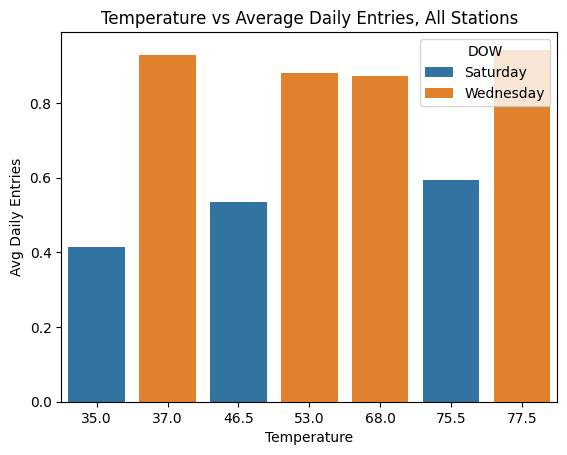

In [30]:
ax = sns.barplot(x=dt['Temp'], y=dt['Avg Daily Entries'], data=dt, hue='DOW', errorbar = None, dodge = False)

plt.xlabel('Temperature')
plt.ylabel('Avg Daily Entries')
plt.title('Temperature vs Average Daily Entries, All Stations')
plt.show()

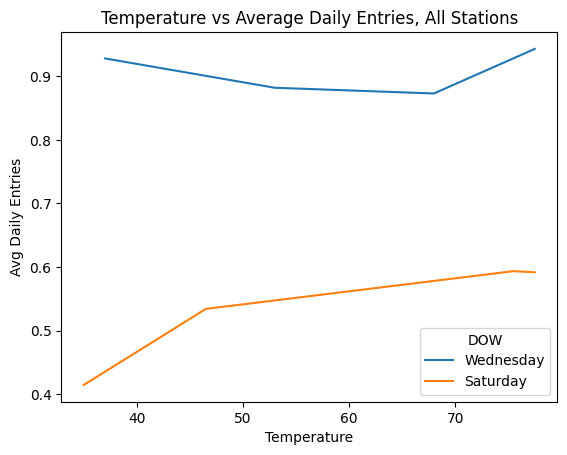

In [31]:
ax = sns.lineplot(x=dt['Temp'], y=dt['Avg Daily Entries'], data=dt, hue='DOW', errorbar = None)

plt.xlabel('Temperature')
plt.ylabel('Avg Daily Entries')
plt.title('Temperature vs Average Daily Entries, All Stations')
plt.show()

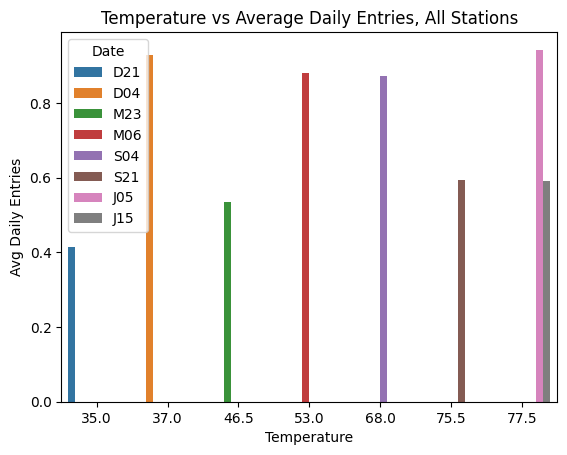

In [32]:
ax = sns.barplot(x=dt['Temp'], y=dt['Avg Daily Entries'], data=dt, hue='Date', errorbar = None)

plt.xlabel('Temperature')
plt.ylabel('Avg Daily Entries')
plt.title('Temperature vs Average Daily Entries, All Stations')
plt.show()

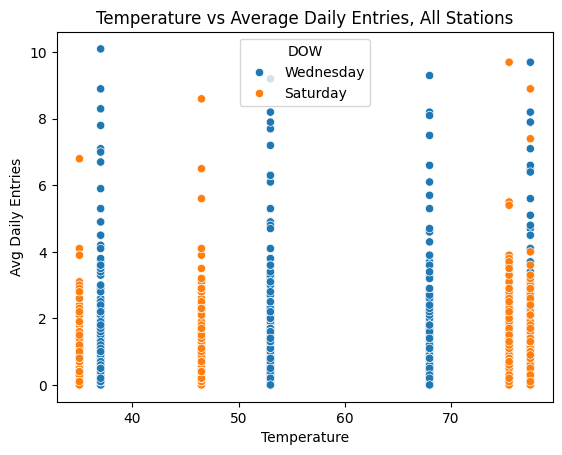

In [33]:
ax = sns.scatterplot(x=dt['Temp'], y=dt['Avg Daily Entries'], data=dt, hue='DOW')



plt.xlabel('Temperature')
plt.ylabel('Avg Daily Entries')
plt.title('Temperature vs Average Daily Entries, All Stations')
plt.show()

In [34]:
jun_5th_24 = dt[dt['Date'] == 'J05']
jun_5th_24

,Station Name,Time Period,Avg Daily Entries,Date,DOW,Temp
979,North Bethesda,Midday (9:30am-3pm),0.6,J05,Wednesday,77.5
980,NoMa-Gallaudet U,Midday (9:30am-3pm),2.4,J05,Wednesday,77.5
981,New Carrollton,Midday (9:30am-3pm),0.9,J05,Wednesday,77.5
982,Naylor Road,Midday (9:30am-3pm),0.4,J05,Wednesday,77.5
983,Morgan Boulevard,Midday (9:30am-3pm),0.2,J05,Wednesday,77.5
...,...,...,...,...,...,...
1454,Foggy Bottom-GWU,Evening (7pm-12am),2.3,J05,Wednesday,77.5
1455,Federal Triangle,Evening (7pm-12am),0.5,J05,Wednesday,77.5
1456,Federal Center SW,Evening (7pm-12am),0.2,J05,Wednesday,77.5
1457,Farragut West,Evening (7pm-12am),1.8,J05,Wednesday,77.5


In [35]:
jun_5th_24['Time Period Ordered'] = pd.Categorical(jun_5th_24['Time Period'], categories=['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)', 'Late Night (12am-Close)'], ordered=True)
jun_5th_24['Time Period Ordered']



<ipython-input-35-6b26060ab039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jun_5th_24['Time Period Ordered'] = pd.Categorical(jun_5th_24['Time Period'], categories=['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)', 'Late Night (12am-Close)'], ordered=True)


,Time Period Ordered
979,Midday (9:30am-3pm)
980,Midday (9:30am-3pm)
981,Midday (9:30am-3pm)
982,Midday (9:30am-3pm)
983,Midday (9:30am-3pm)
...,...
1454,Evening (7pm-12am)
1455,Evening (7pm-12am)
1456,Evening (7pm-12am)
1457,Evening (7pm-12am)


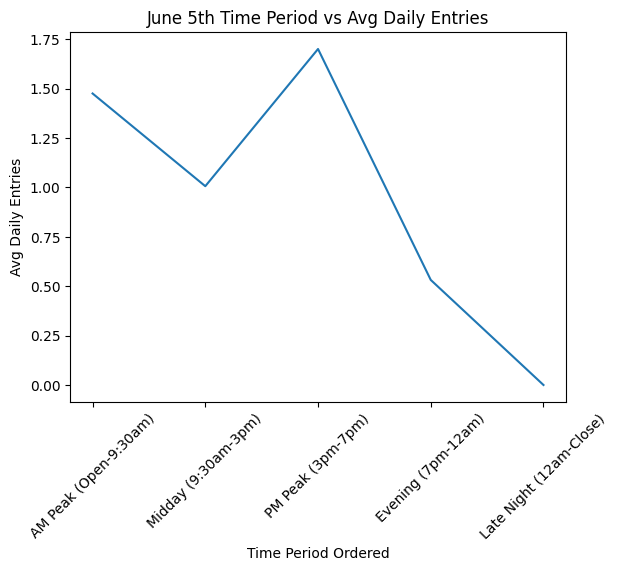

In [36]:
ax = sns.lineplot(x=jun_5th_24['Time Period Ordered'], y=jun_5th_24['Avg Daily Entries'], data=jun_5th_24, errorbar = None)
plt.xticks(rotation=45)
plt.title("June 5th Time Period vs Avg Daily Entries")
plt.show()


<ipython-input-37-ab4eabee2207>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jun_5th_24['color'] = jun_5th_24['Station Name'].apply(lambda x: 'top' if x in top_5_stations.values else 'normal')
<ipython-input-37-ab4eabee2207>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


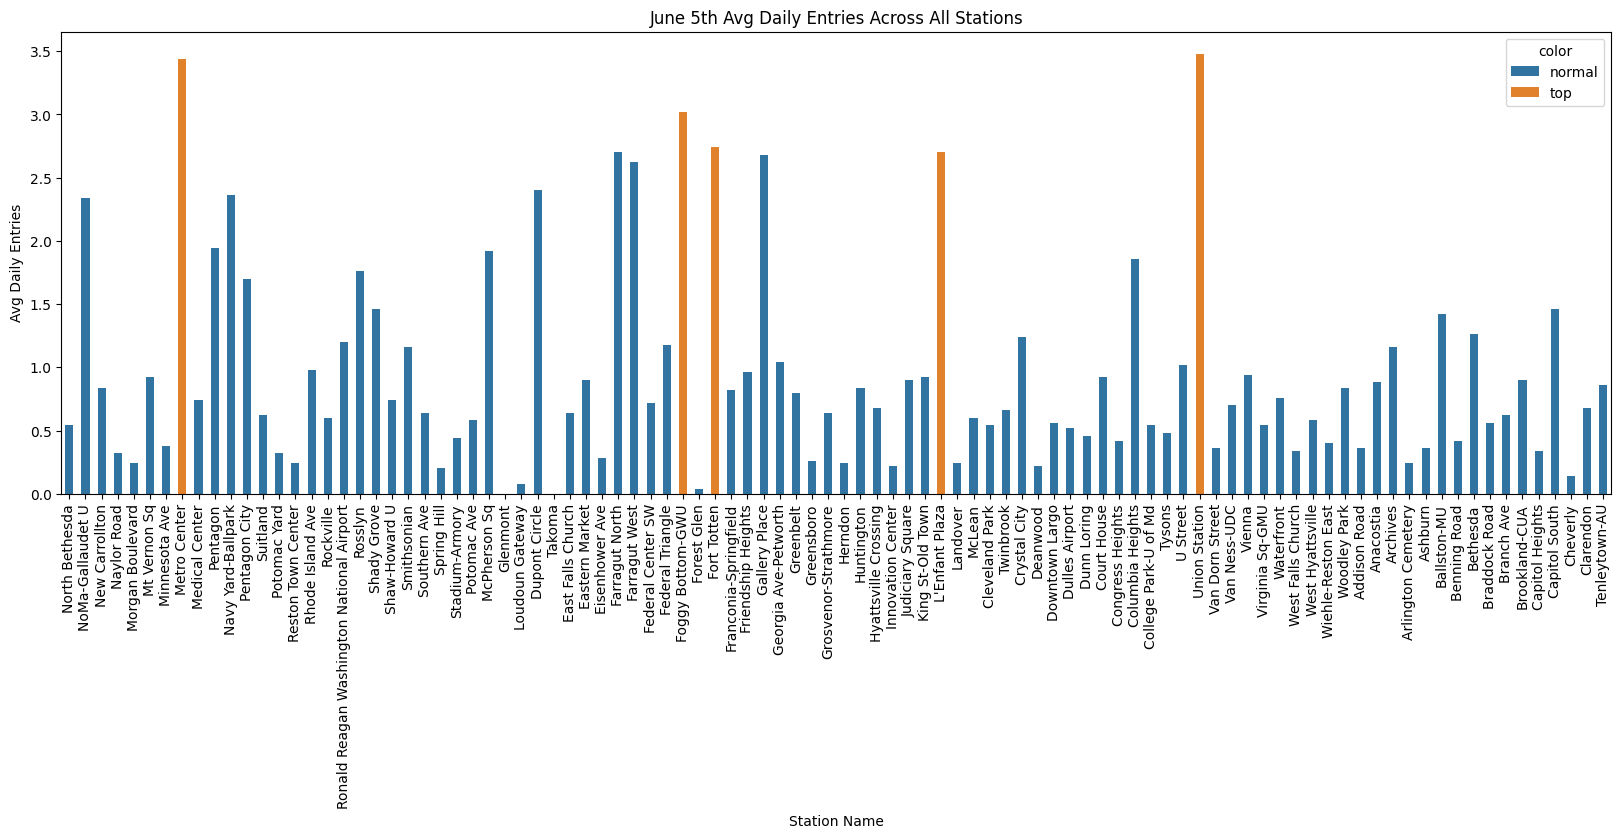

86       Union Station
56        Metro Center
33    Foggy Bottom-GWU
35         Fort Totten
50      L'Enfant Plaza
Name: Station Name, dtype: object


In [37]:
station_entries = jun_5th_24.groupby('Station Name')['Avg Daily Entries'].sum().reset_index()
top_5_stations = station_entries.nlargest(5, 'Avg Daily Entries')['Station Name']
jun_5th_24['color'] = jun_5th_24['Station Name'].apply(lambda x: 'top' if x in top_5_stations.values else 'normal')




plt.figure(figsize=(20, 6))
ax = sns.barplot(x=jun_5th_24['Station Name'], y=jun_5th_24['Avg Daily Entries'], data=jun_5th_24, hue = "color", errorbar = None, width = 0.5, dodge = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("June 5th Avg Daily Entries Across All Stations")
plt.show()

print(top_5_stations)


<ipython-input-38-96e7503e3c23>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


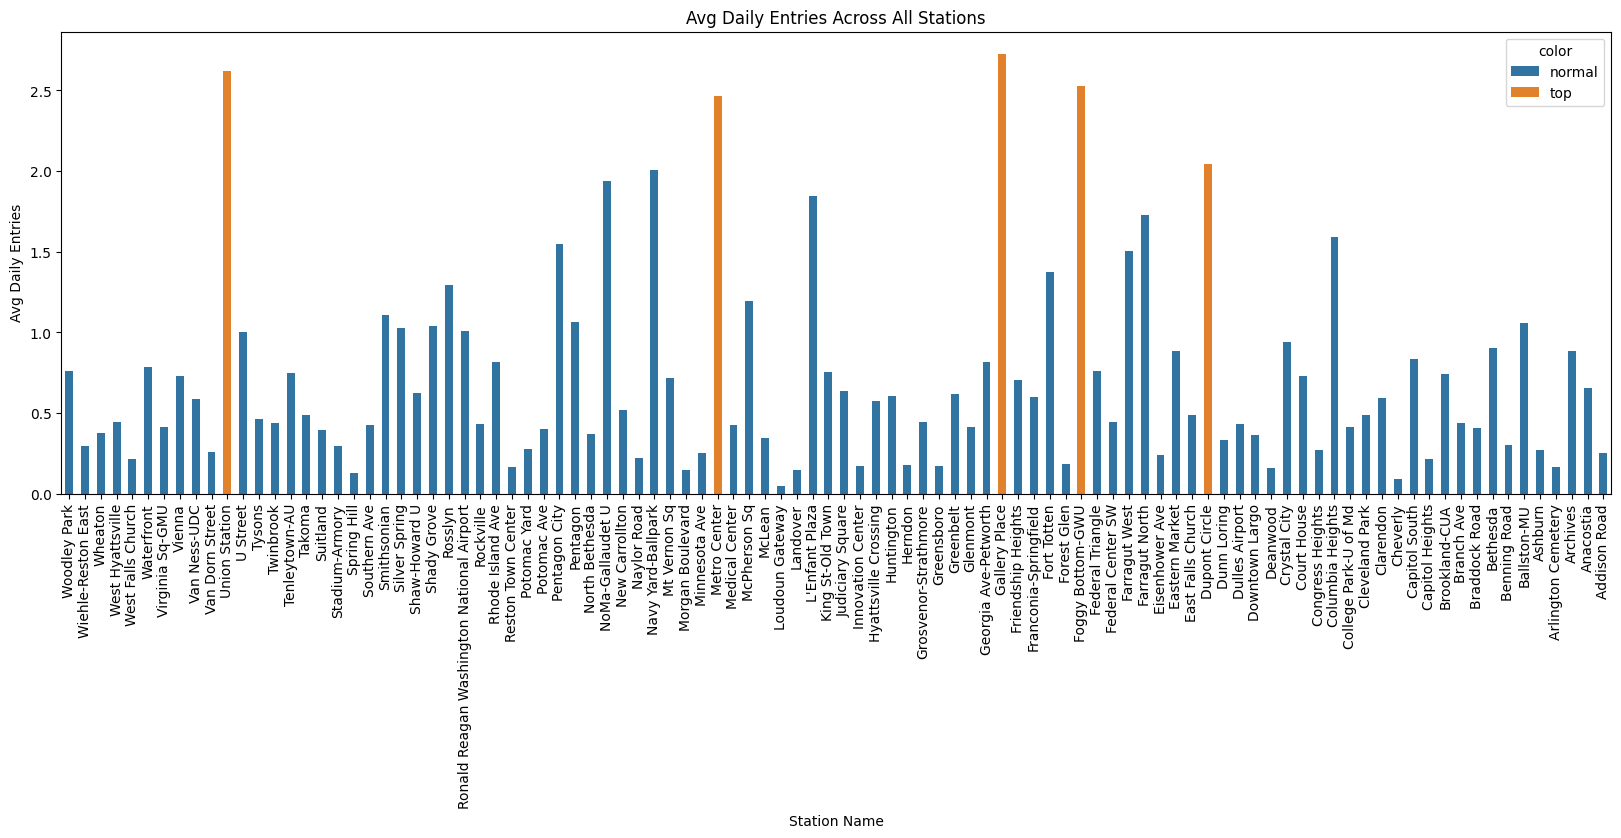

38       Gallery Place
87       Union Station
33    Foggy Bottom-GWU
56        Metro Center
25       Dupont Circle
Name: Station Name, dtype: object


In [38]:

station_entries = df.groupby('Station Name')['Avg Daily Entries'].sum().reset_index()
top_5_stations = station_entries.nlargest(5, 'Avg Daily Entries')['Station Name']
df['color'] = df['Station Name'].apply(lambda x: 'top' if x in top_5_stations.values else 'normal')




plt.figure(figsize=(20, 6))
ax = sns.barplot(x=df['Station Name'], y=df['Avg Daily Entries'], data=df, hue = "color", errorbar = None, width = 0.5, dodge = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Avg Daily Entries Across All Stations")
plt.show()

print(top_5_stations)

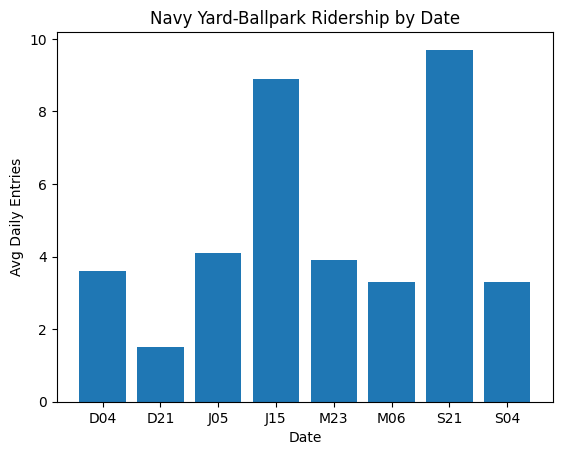

In [39]:
all_time_ballpark = df[df['Station Name'] == 'Navy Yard-Ballpark']
plt.bar(all_time_ballpark['Date'], all_time_ballpark['Avg Daily Entries'])

plt.xlabel('Date')
plt.ylabel('Avg Daily Entries')
plt.title('Navy Yard-Ballpark Ridership by Date')
plt.show()

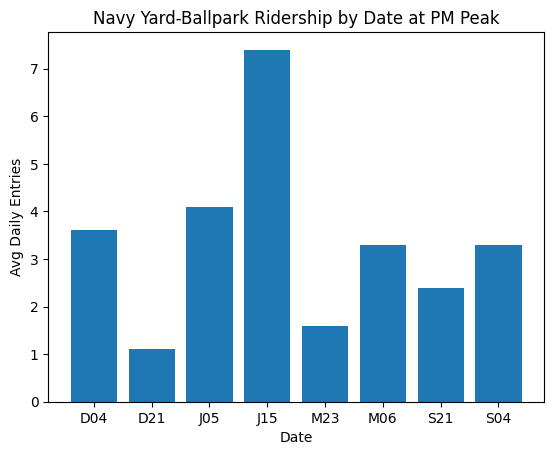

In [40]:
all_time_ballpark_PM = all_time_ballpark[all_time_ballpark['Time Period'] == 'PM Peak (3pm-7pm)']
all_time_ballpark_PM
plt.bar(all_time_ballpark_PM['Date'], all_time_ballpark_PM['Avg Daily Entries'])

plt.xlabel('Date')
plt.ylabel('Avg Daily Entries')
plt.title('Navy Yard-Ballpark Ridership by Date at PM Peak')
plt.show()

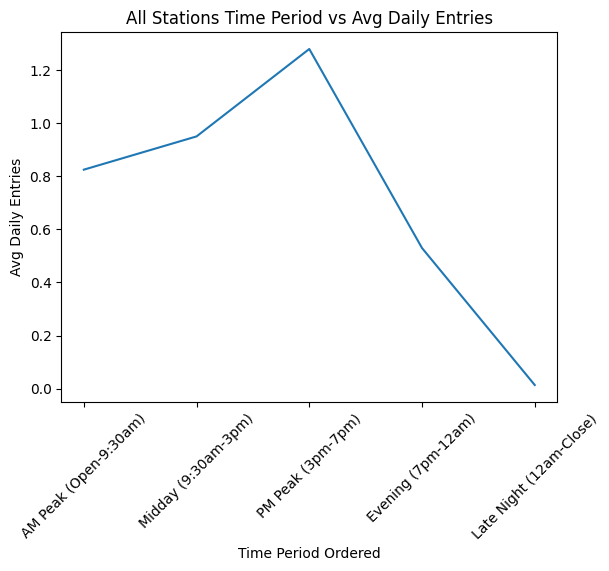

In [41]:
df['Time Period Ordered'] = pd.Categorical(df['Time Period'], categories=['AM Peak (Open-9:30am)', 'Midday (9:30am-3pm)', 'PM Peak (3pm-7pm)', 'Evening (7pm-12am)', 'Late Night (12am-Close)'], ordered=True)
df['Time Period Ordered']

ax = sns.lineplot(x=df['Time Period Ordered'], y=df['Avg Daily Entries'], data=df, errorbar = None)
plt.xticks(rotation=45)
plt.title("All Stations Time Period vs Avg Daily Entries")
plt.show()